**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 1

### Pamela E. Pairo

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import requests
import geojson
from mpl_toolkits.axes_grid1 import make_axes_locatable

import seaborn as sns
sns.set_context('talk')

In [2]:
import plotly
plotly.__version__
# Make sure it's 4.14.3

'4.14.3'

In [3]:
melb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df[:4]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0



Estudiemos la definición de las variables que vamos a tener desplegadas en columnas. Recordemos que los casos son las filas.

Variables

Suburb: region

Address: property address

Rooms: Number of rooms

Price: Price in dollars

Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size

BuildingArea: Building Size

CouncilArea: Governing council for the area

## Mis variables - PAME

- Regionname
- CouncilArea
- Suburb
- Distance
- Postcode
- Porpertycount

Se trabaja con la base de datos en el cual se le quitan los outliers para la variable `Price`, la cual es la variable respuesta. 

In [5]:
melb_in = melb_df[np.abs(melb_df.Price - melb_df.Price.mean()) <= (2.5 * melb_df.Price.std())]
melb_in.shape

(13208, 21)

In [6]:
region= 'Regionname'
councilArea= 'CouncilArea'
suburb='Suburb'
distance='Distance'
postcode= 'Postcode'
propertycount='Propertycount'
lat= 'Lattitude'
long= 'Longtitude'
price= 'Price'

selected_columns=[
    region,
    councilArea,
    suburb,
    distance,
    postcode,
    propertycount,
    lat,
    long,
    price
    
]

melb= melb_in[selected_columns]
melb[:5]

,Regionname,CouncilArea,Suburb,Distance,Postcode,Propertycount,Lattitude,Longtitude,Price
0,Northern Metropolitan,Yarra,Abbotsford,2.5,3067.0,4019.0,-37.7996,144.9984,1480000.0
1,Northern Metropolitan,Yarra,Abbotsford,2.5,3067.0,4019.0,-37.8079,144.9934,1035000.0
2,Northern Metropolitan,Yarra,Abbotsford,2.5,3067.0,4019.0,-37.8093,144.9944,1465000.0
3,Northern Metropolitan,Yarra,Abbotsford,2.5,3067.0,4019.0,-37.7969,144.9969,850000.0
4,Northern Metropolitan,Yarra,Abbotsford,2.5,3067.0,4019.0,-37.8072,144.9941,1600000.0


In [7]:
melb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13208 entries, 0 to 13579
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Regionname     13208 non-null  object 
 1   CouncilArea    11883 non-null  object 
 2   Suburb         13208 non-null  object 
 3   Distance       13208 non-null  float64
 4   Postcode       13208 non-null  float64
 5   Propertycount  13208 non-null  float64
 6   Lattitude      13208 non-null  float64
 7   Longtitude     13208 non-null  float64
 8   Price          13208 non-null  float64
dtypes: float64(6), object(3)
memory usage: 1.0+ MB


In [8]:
#evaluando valores faltantes

melb.isnull().sum()

Regionname          0
CouncilArea      1325
Suburb              0
Distance            0
Postcode            0
Propertycount       0
Lattitude           0
Longtitude          0
Price               0
dtype: int64

In [11]:
#niveles de la variable categorica `region`
melb[region].unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria'], dtype=object)

In [10]:
#niveles de la variable categorica `councilArea`
melb[councilArea].unique()

array(['Yarra', 'Moonee Valley', 'Port Phillip', 'Darebin', 'Hobsons Bay',
       'Stonnington', 'Boroondara', 'Monash', 'Glen Eira', 'Whitehorse',
       'Maribyrnong', 'Bayside', 'Moreland', 'Manningham', 'Banyule',
       'Melbourne', 'Kingston', 'Brimbank', 'Hume', nan, 'Knox',
       'Maroondah', 'Casey', 'Melton', 'Greater Dandenong', 'Nillumbik',
       'Whittlesea', 'Frankston', 'Macedon Ranges', 'Yarra Ranges',
       'Wyndham', 'Cardinia', 'Unavailable', 'Moorabool'], dtype=object)

In [12]:
# Numero de niveles de 'councilArea'
melb[councilArea].value_counts().count()

33

In [13]:
#Numero de niveles de 'suburb'
melb[suburb].value_counts().count()

314

In [14]:
#Cantidad de `Suburb`s que tienen una única vivienda

(melb[suburb].value_counts() == 1).value_counts()

False    292
True      22
Name: Suburb, dtype: int64

In [15]:
# `suburb` por `region` en orden descendente
melb.groupby(suburb).count().sort_values(region, ascending=False)

,Regionname,CouncilArea,Distance,Postcode,Propertycount,Lattitude,Longtitude,Price
Suburb,,,,,,,,
Reservoir,359,323,359,359,359,359,359,359
Richmond,255,246,255,255,255,255,255,255
Bentleigh East,249,234,249,249,249,249,249,249
Preston,239,229,239,239,239,239,239,239
Brunswick,222,208,222,222,222,222,222,222
...,...,...,...,...,...,...,...,...
Sandhurst,1,1,1,1,1,1,1,1
Attwood,1,0,1,1,1,1,1,1
Bacchus Marsh,1,1,1,1,1,1,1,1


# Estadística descriptiva

In [16]:
melb.describe()

,Distance,Postcode,Propertycount,Lattitude,Longtitude,Price
count,13208.000000,13208.000000,13208.000000,13208.000000,13208.000000,1.320800e+04
mean,10.206451,3104.468125,7451.948819,-37.808204,144.994246,1.010123e+06
std,5.912299,91.523094,4407.153751,0.079810,0.104910,4.939022e+05
min,0.000000,3000.000000,249.000000,-38.182550,144.431810,8.500000e+04
25%,6.200000,3044.000000,4380.000000,-37.856400,144.927292,6.418750e+05
50%,9.300000,3083.000000,6543.000000,-37.800380,144.999045,8.900000e+05
75%,13.000000,3148.000000,10331.000000,-37.754640,145.057912,1.300000e+06
max,48.100000,3977.000000,21650.000000,-37.408530,145.526350,2.670000e+06


### Análisis de los precios de la vivienda por Región.

Para analizar las medidas de tendencia central por `region` se realizó un boxplot como se muestra a continuación. `Souther Metropolitan` es la región con la media mas alta en el precio de las viviendas y también no posee outliers. Luego, se observa un gran número de outliers para las regiones `Northern Metropolitan`, `Western Metropolitan`, `Eastern Metropolitan` y `SouthEastern Metropolitan`. `Western Victoria` es la región con una media y mediana mas baja en el precio de las viviendas.

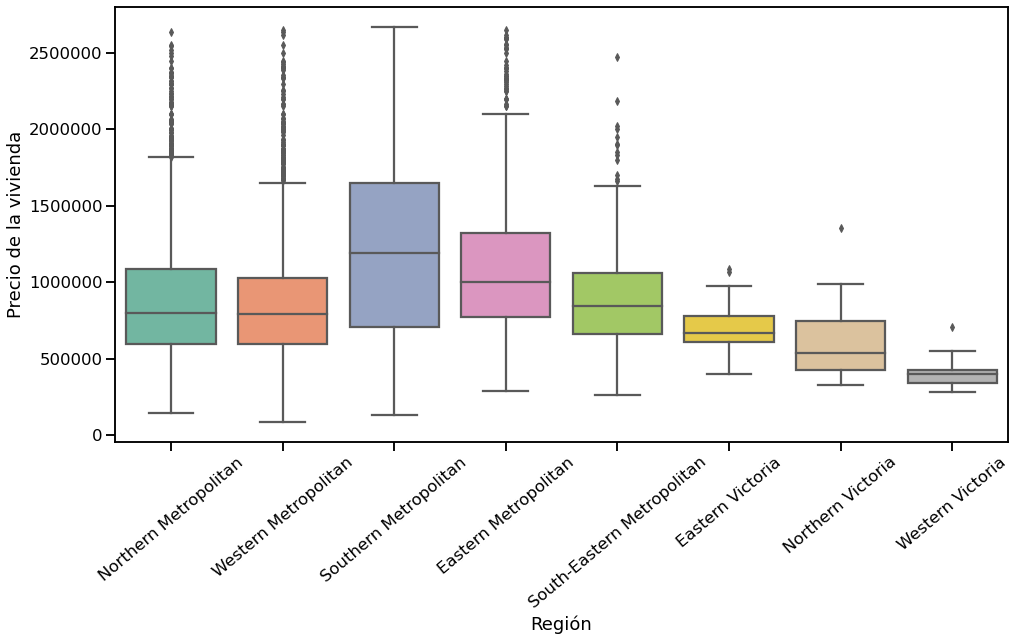

In [17]:
plt.figure(figsize=(16, 8))
sns.boxplot(x=region, y=price, palette="Set2", data=melb)
plt.xticks(rotation=40)
plt.ylabel("Precio de la vivienda")
plt.xlabel("Región")
plt.ticklabel_format(style='plain', axis='y')

La siguiente tabla muestra `Southern Metropolitan` es la región con mayor cantidad de viviendas (4377) y por el contrario `Eastern Victoria`, `Northern Victoria` y `Western Victoria` tienen menos de 100 viviendas en el dataset.

In [21]:
#cantidad de viviendas por region
melb[[region, price]].groupby(region).count().sort_values(price, ascending=False)

,Price
Regionname,
Southern Metropolitan,4377
Northern Metropolitan,3860
Western Metropolitan,2939
Eastern Metropolitan,1458
South-Eastern Metropolitan,448
Eastern Victoria,53
Northern Victoria,41
Western Victoria,32


Analizando las medidas de tendencia central para la variable `Suburb` y `Price` se observa que algunos suburbios tienen una única vivienda con precio y otros como `Boroondara` tiene mas de 1000 viviendas.

In [25]:
melb[[councilArea, price]].groupby(councilArea).describe().round(2)

Price                                               \
                    count        mean        std        min        25%   
CouncilArea                                                              
Banyule             589.0   925738.96  433754.41   330000.0   655000.0   
Bayside             436.0  1457337.84  559959.47   290000.0   967500.0   
Boroondara         1026.0  1415698.48  638697.04   160000.0   780000.0   
Brimbank            424.0   647200.71  154548.27   145000.0   560000.0   
Cardinia              8.0   573125.00  105863.37   410500.0   511500.0   
Casey                38.0   656407.89  165065.09   400000.0   574000.0   
Darebin             927.0   898761.85  406099.60   216000.0   610000.0   
Frankston            53.0   658984.87  188087.31   266000.0   552500.0   
Glen Eira           843.0  1058970.64  464228.48   131000.0   704500.0   
Greater Dandenong    52.0   697067.31  173325.97   305000.0   616250.0   
Hobsons Bay         429.0   977331.12  401560.03   285000.0   720000.0   
Hume                164.0   561406.71  147795.50   280000.0   458000.0   
Kingston            207.0   977612.79  298171.79   240000.0   800000.0   
Knox                 80.0   894896.10  293061.86   450000.0   716625.0   
Macedon Ranges        7.0   631571.43  162238.36   426000.0   528000.0   
Manningham          310.0  1230419.35  350819.28   400000.0   986250.0   
Maribyrnong         692.0   811698.76  319122.10    85000.0   588750.0   
Maroondah            80.0   851025.00  237849.53   475000.0   700750.0   
Melbourne           461.0   877647.57  451878.59   210000.0   540000.0   
Melton               66.0   499622.73  164947.48   280500.0   373875.0   
Monash              331.0  1138925.08  382631.04   305000.0   865000.0   
Moonee Valley       994.0   980657.34  419308.19   222000.0   700000.0   
Moorabool             1.0   285000.00        NaN   285000.0   285000.0   
Moreland           1162.0   824794.73  326629.29   145000.0   600000.0   
Nillumbik            36.0   859319.44  162983.70   540000.0   783000.0   
Port Phillip        601.0  1039376.12  587903.45   275000.0   550000.0   
Stonnington         663.0  1088454.84  616324.10   240000.0   565500.0   
Unavailable           1.0  1325000.00        NaN  1325000.0  1325000.0   
Whitehorse          299.0  1200562.54  465973.17   288000.0   823750.0   
Whittlesea          167.0   630756.29  161034.18   345000.0   530250.0   
Wyndham              86.0   531813.37  128899.29   302500.0   463125.0   
Yarra               632.0  1079953.34  452471.44   270000.0   712000.0   
Yarra Ranges         18.0   746360.11  160860.36   575000.0   638125.0   

                                                    
                         50%        75%        max  
CouncilArea                                         
Banyule             800000.0  1040000.0  2600000.0  
Bayside            1458750.0  1826250.0  2655000.0  
Boroondara         1500000.0  1900000.0  2670000.0  
Brimbank            635400.0   722750.0  1350500.0  
Cardinia            601250.0   658750.0   675000.0  
Casey               626250.0   679000.0  1300000.0  
Darebin             850000.0  1100000.0  2350000.0  
Frankston           640000.0   763000.0  1400000.0  
Glen Eira          1040000.0  1365000.0  2625000.0  
Greater Dandenong   683000.0   760000.0  1250000.0  
Hobsons Bay         910000.0  1200000.0  2640000.0  
Hume                539000.0   645000.0  1170000.0  
Kingston            940000.0  1150000.0  2185000.0  
Knox                857500.0  1011250.0  2020000.0  
Macedon Ranges      540000.0   791000.0   817000.0  
Manningham         1217500.0  1400000.0  2620000.0  
Maribyrnong         816000.0   980625.0  2450000.0  
Maroondah           811500.0   945375.0  1725000.0  
Melbourne           765000.0  1075000.0  2600000.0  
Melton              460500.0   600000.0  1150000.0  
Monash             1100000.0  1356000.0  2650000.0  
Moonee Valley       910000.0  1250000.0  2650000.0  
Moorabool           285000.0  

### Analizando la geolocalización de los datos junto con la `Region`

El objetivo es ver la localización de los datos, la región y los suburbios. A continuación se muestra una imagen extraída de Wikipedia donde se visualiza las regiones electorales de Victoria.

<img src="melbourne.png">

Utilizando el geoservicio **wfs** extraemos la capa vectorial de las regiones de la página del gobierno australiano.

In [26]:
# Especificación del url
url = 'https://data.gov.au/geoserver/vic-state-electoral-boundaries-psma-administrative-boundaries/wfs'

# Especificación de los parámetros (en formato json).
params = dict(service='WFS', version='2.0.0', request='GetFeature',
         typeName='vic-state-electoral-boundaries-psma-administrative-boundaries:ckan_a0d8838b_2423_4c8b_a7d9_b04eb240a2b1', outputFormat='json')

# Obtener datos de WFS mediante solicitudes
r = requests.get(url, params=params)

# Crear GeoDataFrame a partir del formato geojson
data = gpd.GeoDataFrame.from_features(geojson.loads(r.content))

In [30]:
#reproyección
data= data.set_crs('EPSG:3110')

La columna que muestra las regiones es `vic_stat_2`

In [29]:
data.head(5)

,geometry,se_ply_pid,dt_create,dt_retire,se_pid,vic_state_,vic_stat_1,vic_stat_2,vic_stat_3,vic_stat_4,vic_stat_5,vic_stat_6,vic_stat_7
0,"MULTIPOLYGON (((145.34291 -38.50482, 145.34253...",1112,2015-05-05Z,None,VIC221,2015-05-05Z,None,BASS,None,None,2014-11-28Z,2,2
1,"MULTIPOLYGON (((145.34186 -38.50041, 145.34248...",1113,2015-05-05Z,None,VIC195,2015-05-05Z,None,EASTERN VICTORIA,None,None,2014-11-28Z,2,3
2,"MULTIPOLYGON (((145.34607 -38.50860, 145.34597...",1114,2015-05-05Z,None,VIC196,2015-05-05Z,None,EASTERN VICTORIA,2013-10-17Z,2014-11-29Z,None,2,3
3,"MULTIPOLYGON (((145.34607 -38.50860, 145.34597...",1115,2015-05-05Z,None,VIC220,2015-05-05Z,None,BASS,2013-10-17Z,2014-11-29Z,None,2,2
4,"MULTIPOLYGON (((145.30997 -38.23814, 145.30983...",1116,2015-05-05Z,None,VIC195,2015-05-05Z,None,EASTERN VICTORIA,None,None,2014-11-28Z,2,3


In [31]:
#niveles de la variable `vic_stat_2`
data['vic_stat_2'].unique()

array(['BASS', 'EASTERN VICTORIA', 'HASTINGS', 'GIPPSLAND SOUTH',
       'NORTHERN VICTORIA', 'WESTERN VICTORIA', 'BELLARINE',
       'SOUTHERN METROPOLITAN', 'LOWAN', 'POLWARTH', 'RIPON', 'EUROA',
       'BENALLA', 'OVENS VALLEY', 'BENAMBRA', 'GIPPSLAND EAST', 'MILDURA',
       'SWAN HILL', 'MURRAY PLAINS', 'SOUTH-WEST COAST', 'BUNINYONG',
       'BALLARAT EAST', 'BENDIGO WEST', 'BENDIGO EAST', 'SEYMOUR',
       'RODNEY', 'SHEPPARTON', 'NARRACAN', 'GEMBROOK', 'EILDON',
       'MURRAY VALLEY', 'SOUTH BARWON', 'NEPEAN', 'WESTERN METROPOLITAN',
       'BENTLEIGH', 'CLAYTON', 'CAULFIELD', 'HAWTHORN', 'MALVERN', 'KEW',
       'BURWOOD', 'MACEDON', 'SOUTH EASTERN METROPOLITAN',
       'SOUTH-EASTERN METROPOLITAN', 'EASTERN METROPOLITAN', 'YAN YEAN',
       'NORTHERN METROPOLITAN', 'MORWELL', 'LARA', 'WERRIBEE', 'MELTON',
       'TARNEIT', 'KOROROIT', 'SUNBURY', 'MONBULK', 'EVELYN', 'GEELONG',
       'MORNINGTON', 'FRANKSTON', 'MORDIALLOC', 'CARRUM', 'KEYSBOROUGH',
       'CRANBOURNE', 'BALL

Se seleccionan las regiones de interés

In [32]:
key_regions= ['NORTHERN METROPOLITAN', 'WESTERN METROPOLITAN',
       'SOUTHERN METROPOLITAN', 'EASTERN METROPOLITAN',
       'SOUTH-EASTERN METROPOLITAN','EASTERN VICTORIA',
       'NORTHERN VICTORIA', 'WESTERN VICTORIA']

sel_data= data.loc[data['vic_stat_2'].isin(key_regions)]

In [33]:
sel_data.shape

(29, 13)

Convertimos los datos de la base de datos `melb` en un objeto Geodataframe para que pueda ser leido por el paquete {Geopandas} y así realizar mapas.

In [35]:
viviendas= gpd.GeoDataFrame(melb, geometry=gpd.points_from_xy(melb.Longtitude, melb.Lattitude))

In [36]:
viviendas.head(5)

,Regionname,CouncilArea,Suburb,Distance,Postcode,Propertycount,Lattitude,Longtitude,Price,geometry
0,Northern Metropolitan,Yarra,Abbotsford,2.5,3067.0,4019.0,-37.7996,144.9984,1480000.0,POINT (144.99840 -37.79960)
1,Northern Metropolitan,Yarra,Abbotsford,2.5,3067.0,4019.0,-37.8079,144.9934,1035000.0,POINT (144.99340 -37.80790)
2,Northern Metropolitan,Yarra,Abbotsford,2.5,3067.0,4019.0,-37.8093,144.9944,1465000.0,POINT (144.99440 -37.80930)
3,Northern Metropolitan,Yarra,Abbotsford,2.5,3067.0,4019.0,-37.7969,144.9969,850000.0,POINT (144.99690 -37.79690)
4,Northern Metropolitan,Yarra,Abbotsford,2.5,3067.0,4019.0,-37.8072,144.9941,1600000.0,POINT (144.99410 -37.80720)


In [37]:
#verificar el tipo de objeto de `viviendas`
type(viviendas)

geopandas.geodataframe.GeoDataFrame

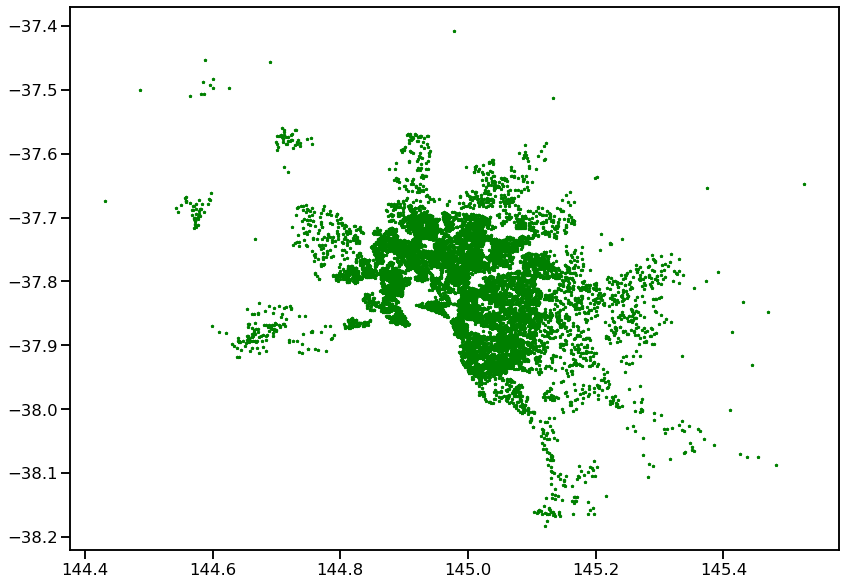

In [38]:
#plot de las `viviendas`
viviendas.plot(marker='*', color='green', markersize=5,figsize=(15, 10))
viviendas = viviendas.set_crs('epsg:3110')

Se quiere superponer la capa de `regiones` con los puntos dados por el dataset `viviendas`. Para ellos primero se disuelve la variable `region`

In [53]:
# se seleccionan las variables que se usan para disolver
region_boundary = sel_data[['vic_stat_2', 'geometry']]

# disolver las regiones
regions = region_boundary.dissolve(by='vic_stat_2')

# view the resulting geodataframe
regions

,geometry
vic_stat_2,
EASTERN METROPOLITAN,"POLYGON ((145.30305 -37.86371, 145.30317 -37.8..."
EASTERN VICTORIA,"MULTIPOLYGON (((145.36427 -38.55338, 145.36419..."
NORTHERN METROPOLITAN,"POLYGON ((145.09958 -37.69248, 145.09959 -37.6..."
NORTHERN VICTORIA,"POLYGON ((146.92447 -36.10327, 146.92429 -36.1..."
SOUTH-EASTERN METROPOLITAN,"POLYGON ((145.38184 -38.06983, 145.38184 -38.0..."
SOUTHERN METROPOLITAN,"MULTIPOLYGON (((145.00976 -37.96841, 145.00980..."
WESTERN METROPOLITAN,"POLYGON ((144.94038 -37.78764, 144.94033 -37.7..."
WESTERN VICTORIA,"POLYGON ((144.69844 -38.24787, 144.69844 -38.2..."


In [54]:
#reseteo del index
regions.reset_index(inplace=True)

(140.51118255, 150.42701045, -39.394345900000005, -33.7235181)

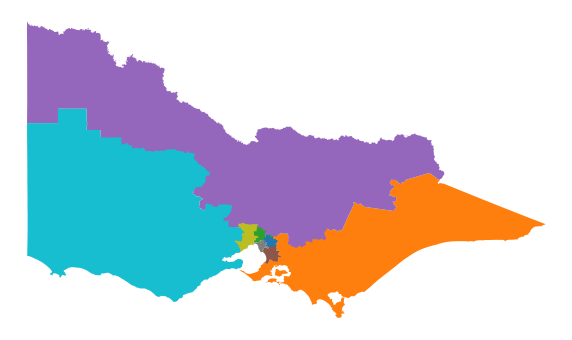

In [56]:
fig, ax = plt.subplots(figsize = (10,6))
regions.plot(column = 'vic_stat_2', ax=ax)

ax.set_axis_off()
plt.axis('equal')

El mapa muestra que la mayoria de los puntos se concentran en la región de Metropolitana

Text(0.5, 271.8612924070616, 'Longitude')

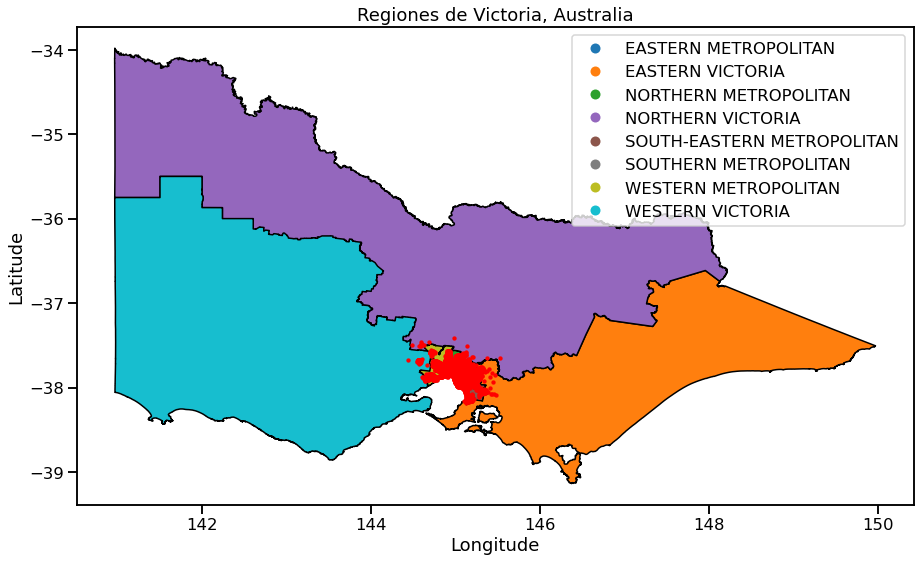

In [59]:
base = regions.plot(column='vic_stat_2', categorical=True, edgecolor='black',figsize=(15, 15), legend=True)
puntos= viviendas.plot(ax=base, marker='o', markersize=8,color= 'red')
base.set(title='Regiones de Victoria, Australia')
plt.ylabel('Latitude')
plt.xlabel('Longitude')

Se realiza un nuevo mapa focalizandonos en el Área Metropolitana.

In [60]:
metropolitan= ['NORTHERN METROPOLITAN', 'WESTERN METROPOLITAN',
       'SOUTHERN METROPOLITAN', 'EASTERN METROPOLITAN',
       'SOUTH-EASTERN METROPOLITAN']

reg_metropolitan= regions.loc[regions['vic_stat_2'].isin(metropolitan)]

Incluimos en el mapa la variable `Distance` y vemos si hay algun patrón espacial.

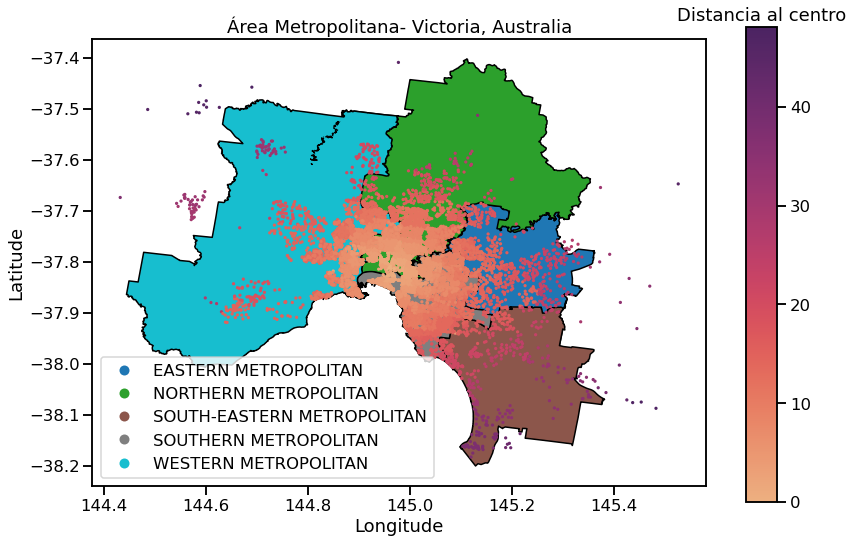

In [68]:
cmap= sns.color_palette("flare", as_cmap=True)

base = reg_metropolitan.plot(column='vic_stat_2', categorical=True, edgecolor='black',figsize=(11, 11), legend=True)
puntos= viviendas.plot(ax=base, marker='o', markersize=3, column= 'Distance',cmap=cmap)
base.set(title='Área Metropolitana- Victoria, Australia')
# manipulate the colorbar `cax`

plt.ylabel('Latitude')
plt.xlabel('Longitude')

fig = puntos.get_figure()
# add colorbar axes to the figure
# here, need trial-and-error to get [l,b,w,h] right
# l:left, b:bottom, w:width, h:height; in normalized unit (0-1)
cbax = fig.add_axes([0.95, 0.2, 0.04, 0.60])   
cbax.set_title('Distancia al centro')

sm = plt.cm.ScalarMappable(cmap=cmap, \
                norm=plt.Normalize(vmin=min(viviendas.Distance), vmax=max(viviendas.Distance)))

fig.colorbar(sm, cax=cbax, format="%d")

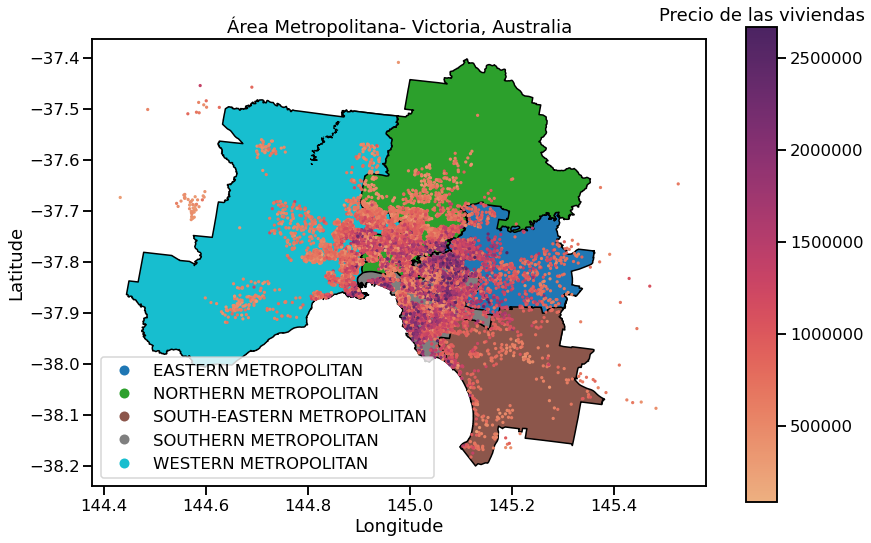

In [69]:
cmap= sns.color_palette("flare", as_cmap=True)

base = reg_metropolitan.plot(column='vic_stat_2', categorical=True, edgecolor='black',figsize=(11, 11), legend=True)
puntos= viviendas.plot(ax=base, marker='o', markersize=3, column= 'Price',cmap=cmap)
base.set(title='Área Metropolitana- Victoria, Australia')
# manipulate the colorbar `cax`

plt.ylabel('Latitude')
plt.xlabel('Longitude')

fig = puntos.get_figure()
# add colorbar axes to the figure
# here, need trial-and-error to get [l,b,w,h] right
# l:left, b:bottom, w:width, h:height; in normalized unit (0-1)
cbax = fig.add_axes([0.95, 0.2, 0.04, 0.60])   
cbax.set_title('Precio de las viviendas')

sm = plt.cm.ScalarMappable(cmap=cmap, \
                norm=plt.Normalize(vmin=min(viviendas.Price), vmax=max(viviendas.Price)))

fig.colorbar(sm, cax=cbax, format="%d")

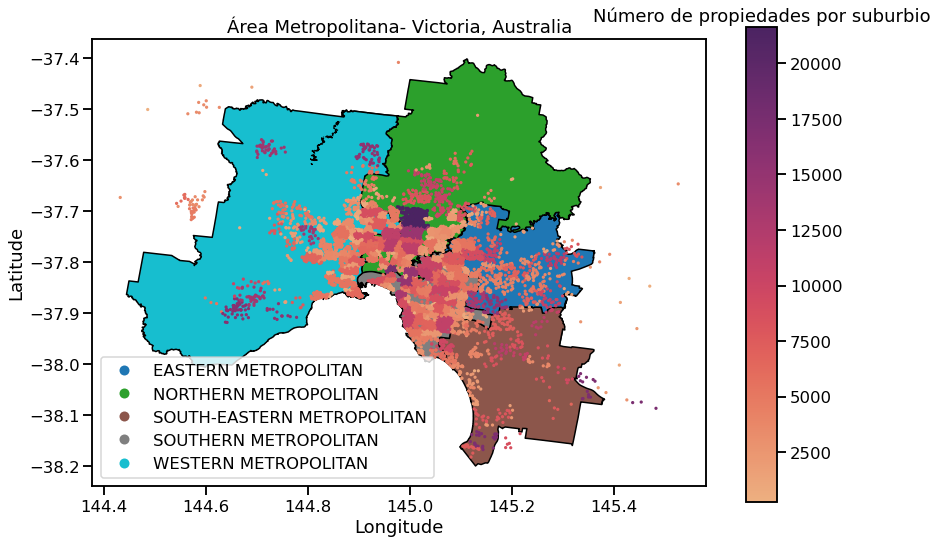

In [70]:
cmap= sns.color_palette("flare", as_cmap=True)

base = reg_metropolitan.plot(column='vic_stat_2', categorical=True, edgecolor='black',figsize=(11, 11), legend=True)
puntos= viviendas.plot(ax=base, marker='o', markersize=3, column= 'Propertycount',cmap=cmap)
base.set(title='Área Metropolitana- Victoria, Australia')
# manipulate the colorbar `cax`

plt.ylabel('Latitude')
plt.xlabel('Longitude')

fig = puntos.get_figure()
# add colorbar axes to the figure
# here, need trial-and-error to get [l,b,w,h] right
# l:left, b:bottom, w:width, h:height; in normalized unit (0-1)
cbax = fig.add_axes([0.95, 0.2, 0.04, 0.60])   
cbax.set_title('Número de propiedades por suburbio')

sm = plt.cm.ScalarMappable(cmap=cmap, \
                norm=plt.Normalize(vmin=min(viviendas.Propertycount), vmax=max(viviendas.Propertycount)))

fig.colorbar(sm, cax=cbax, format="%d")

In [ ]:
#sns.pairplot(data=melb[melb[region]=='Eastern Victoria'])
#plt.ticklabel_format(style='plain', axis='y')